In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

import sympy as sp

The general matrix method will be solved:

$$ \mathbf{M} \begin{bmatrix} A \\ B \end{bmatrix} = 0 $$

where 

$$ \mathbf{M} = \begin{bmatrix} 1 & -R_{u} \\ R_{d} & -exp\left(\frac{2i\omega L}{\bar{c}} \right) \end{bmatrix} $$


The aim is to solve for $\omega$ such that $det(\mathbf{M}) = 0$

In [2]:
# Defining variables
c = 345 # m/s, speed of sound
L = 0.75 # m, length of tube
Ru = -1 # upstream reflection coefficient
Rd = -1 # downstream refection coefficient
j = complex(0, 1)
e = np.e

# Function which returns the determinent of the matrix M
def matrix_det(w, Ru, Rd):
    det = e**((2*j*w*L/c)) + Rd * Ru
    return det

In [3]:
# using solver to solve for w which gives det(M) = 0
w = sp.Symbol('w')
[wl] = sp.solvers.solve(matrix_det(w, Ru, Rd), w)
wl = float(wl)

In [4]:
# plotting nodeshape, saying A = 1
x = np.linspace(0, L, 100)
p = np.exp((j*wl*(-x/c))) + Rd*np.exp((2*j*wl*(-L/c))*e**(j*wl*x/c))

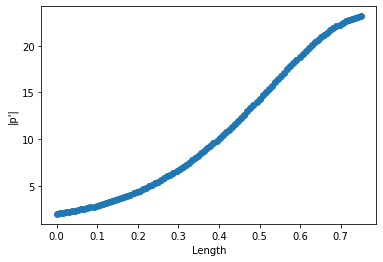

In [5]:
plt.scatter(x, np.abs(p))
plt.ylabel('|p\'|')
plt.xlabel('Length')
plt.show()